### Packages

In [1]:
using DynamicalSystems, CairoMakie,  DifferentialEquations
using StaticArrays
using JLD

### Functions

In [23]:
function sigma(x)
    return 1.0 / ( 1.0 + exp( -10.0 * ( x  - ( - 0.25 ) ) ) )
end
function HR(u, p, t)
        
    a, b, c, d, s, xr, r,  I, vs, chemical_link, electrical_link  = p
    x1, y1, z1, x2, y2, z2 = u
    
    du1 = y1 + b * x1 ^ 2 - a * x1 ^3 - z1 + I - chemical_link * ( x1 - vs ) * sigma(x2) + electrical_link * ( x2 - x1 )
    du2 = c - d * x1 ^2 - y1
    du3 = r * ( s * ( x1 - xr ) - z1 )
    
    du4 = y2 + b * x2 ^ 2 - a * x2 ^3 - z2 + I - chemical_link * ( x2 - vs ) * sigma(x1) + electrical_link * ( x1 - x2 )
    du5 = c - d * x2 ^2 - y2
    du6 = r * ( s * ( x2 - xr ) - z2 )
    return SVector(du1, du2, du3,
                    du4, du5, du6)
end

HR (generic function with 1 method)

### Parametres

In [178]:
a = 1.; b = 3.; c = 1.; d = 5.;
xr = -1.6; r = 0.01; s = 5.; I = 4.; xv = 2.;

chemical_link = -0.17
electrical_link = 0.1

initial_condition = SA[-1.5, 0.0, 0.0, -2.5, 0.0, 0.0]

p = [a, b, c, d, s, xr, r, I, xv, chemical_link, electrical_link]
ds = ContinuousDynamicalSystem(HR,  initial_condition, p )

6-dimensional continuous dynamical system
 state:       [-1.5, 0.0, 0.0, -2.5, 0.0, 0.0]
 rule f:      HR
 in-place?    false
 jacobian:    ForwardDiff
 parameters:  [1.0, 3.0, 1.0, 5.0, 5.0, -1.6, 0.01, 4.0, 2.0, -0.17, 0.1]

### orbitdiagram

In [179]:
start_value_chemical = -0.5
finish_value_chemical = 0.5
len = 5000
range_chemical = range(start_value_chemical, finish_value_chemical, length = len  )

index_fix_var = 2
value_fix_var = 0.1
plane = (index_fix_var, value_fix_var)

transient_step = 1000.0
number_points = 5000.0 #  Amount of points to save for each initial condition.

index_change_param = 10

Δt = 0.01

0.01

#### calculate orbitdiagram

#### visualization 

In [180]:
i = 1
output = produce_orbitdiagram(ds, plane, i, index_change_param, range_chemical;
                              tfinal = number_points, Ttr = transient_step, printparams = true,
                              diffeq = (alg = Vern9(), adaptive = false, dt = Δt)
                                );

i = 4
output1 = produce_orbitdiagram(ds, plane, i, index_change_param, range_chemical;
                               tfinal = number_points, Ttr = transient_step, printparams = true,
                               diffeq = (alg = Vern9(), adaptive = false, dt = Δt)
                                )

output_summ = output + output1;

parameter = -0.5
parameter = -0.4997999599919984
parameter = -0.4995999199839968
parameter = -0.4993998799759952
parameter = -0.4991998399679936
parameter = -0.498999799959992
parameter = -0.4987997599519904
parameter = -0.4985997199439888
parameter = -0.4983996799359872
parameter = -0.4981996399279856
parameter = -0.497999599919984
parameter = -0.4977995599119824
parameter = -0.49759951990398077
parameter = -0.4973994798959792
parameter = -0.4971994398879776
parameter = -0.496999399879976
parameter = -0.4967993598719744
parameter = -0.4965993198639728
parameter = -0.4963992798559712
parameter = -0.4961992398479696
parameter = -0.495999199839968
parameter = -0.4957991598319664
parameter = -0.4955991198239648
parameter = -0.4953990798159632
parameter = -0.4951990398079616
parameter = -0.49499899979996
parameter = -0.49479895979195837
parameter = -0.4945989197839568
parameter = -0.4943988797759552
parameter = -0.4941988397679536
parameter = -0.493998799759952
parameter = -0.4937987597519

parameter = -0.4493898779755951
parameter = -0.44918983796759354
parameter = -0.44898979795959193
parameter = -0.4487897579515903
parameter = -0.4485897179435887
parameter = -0.4483896779355871
parameter = -0.44818963792758554
parameter = -0.4479895979195839
parameter = -0.4477895579115823
parameter = -0.4475895179035807
parameter = -0.4473894778955791
parameter = -0.44718943788757753
parameter = -0.4469893978795759
parameter = -0.4467893578715743
parameter = -0.4465893178635727
parameter = -0.4463892778555711
parameter = -0.44618923784756953
parameter = -0.4459891978395679
parameter = -0.4457891578315663
parameter = -0.4455891178235647
parameter = -0.44538907781556314
parameter = -0.4451890378075615
parameter = -0.4449889977995599
parameter = -0.4447889577915583
parameter = -0.4445889177835567
parameter = -0.44438887777555514
parameter = -0.4441888377675535
parameter = -0.4439887977595519
parameter = -0.4437887577515503
parameter = -0.4435887177435487
parameter = -0.44338867773554713


parameter = -0.39897979595919186
parameter = -0.39877975595119025
parameter = -0.39857971594318864
parameter = -0.398379675935187
parameter = -0.3981796359271854
parameter = -0.39797959591918386
parameter = -0.39777955591118225
parameter = -0.39757951590318064
parameter = -0.397379475895179
parameter = -0.3971794358871774
parameter = -0.39697939587917586
parameter = -0.39677935587117424
parameter = -0.39657931586317263
parameter = -0.396379275855171
parameter = -0.3961792358471694
parameter = -0.39597919583916785
parameter = -0.39577915583116624
parameter = -0.39557911582316463
parameter = -0.395379075815163
parameter = -0.3951790358071614
parameter = -0.39497899579915985
parameter = -0.39477895579115824
parameter = -0.3945789157831566
parameter = -0.394378875775155
parameter = -0.39417883576715346
parameter = -0.39397879575915185
parameter = -0.39377875575115023
parameter = -0.3935787157431486
parameter = -0.393378675735147
parameter = -0.39317863572714545
parameter = -0.3929785957191

parameter = -0.34796959391878374
parameter = -0.3477695539107822
parameter = -0.34756951390278057
parameter = -0.34736947389477896
parameter = -0.34716943388677735
parameter = -0.34696939387877573
parameter = -0.3467693538707742
parameter = -0.34656931386277257
parameter = -0.34636927385477095
parameter = -0.34616923384676934
parameter = -0.34596919383876773
parameter = -0.3457691538307662
parameter = -0.34556911382276456
parameter = -0.34536907381476295
parameter = -0.34516903380676134
parameter = -0.3449689937987597
parameter = -0.34476895379075817
parameter = -0.34456891378275656
parameter = -0.34436887377475495
parameter = -0.34416883376675333
parameter = -0.3439687937587517
parameter = -0.34376875375075017
parameter = -0.34356871374274855
parameter = -0.34336867373474694
parameter = -0.34316863372674533
parameter = -0.3429685937187438
parameter = -0.34276855371074216
parameter = -0.34256851370274055
parameter = -0.34236847369473894
parameter = -0.3421684336867373
parameter = -0.34

parameter = -0.2973594718943789
parameter = -0.2971594318863773
parameter = -0.29695939187837567
parameter = -0.29675935187037406
parameter = -0.2965593118623725
parameter = -0.2963592718543709
parameter = -0.2961592318463693
parameter = -0.29595919183836766
parameter = -0.29575915183036605
parameter = -0.2955591118223645
parameter = -0.2953590718143629
parameter = -0.29515903180636127
parameter = -0.29495899179835966
parameter = -0.29475895179035805
parameter = -0.2945589117823565
parameter = -0.2943588717743549
parameter = -0.29415883176635327
parameter = -0.29395879175835166
parameter = -0.29375875175035004
parameter = -0.2935587117423485
parameter = -0.2933586717343469
parameter = -0.29315863172634526
parameter = -0.29295859171834365
parameter = -0.29275855171034204
parameter = -0.2925585117023405
parameter = -0.2923584716943389
parameter = -0.29215843168633726
parameter = -0.29195839167833565
parameter = -0.2917583516703341
parameter = -0.2915583116623325
parameter = -0.2913582716

parameter = -0.2469493898779756
parameter = -0.246749349869974
parameter = -0.2465493098619724
parameter = -0.2463492698539708
parameter = -0.24614922984596918
parameter = -0.2459491898379676
parameter = -0.24574914982996598
parameter = -0.2455491098219644
parameter = -0.2453490698139628
parameter = -0.2451490298059612
parameter = -0.2449489897979596
parameter = -0.24474894978995798
parameter = -0.2445489097819564
parameter = -0.24434886977395479
parameter = -0.2441488297659532
parameter = -0.2439487897579516
parameter = -0.24374874974994998
parameter = -0.2435487097419484
parameter = -0.24334866973394678
parameter = -0.2431486297259452
parameter = -0.24294858971794359
parameter = -0.242748549709942
parameter = -0.2425485097019404
parameter = -0.24234846969393878
parameter = -0.2421484296859372
parameter = -0.24194838967793558
parameter = -0.241748349669934
parameter = -0.2415483096619324
parameter = -0.24134826965393077
parameter = -0.2411482296459292
parameter = -0.24094818963792758


parameter = -0.19713942788557712
parameter = -0.1969393878775755
parameter = -0.19673934786957392
parameter = -0.1965393078615723
parameter = -0.19633926785357073
parameter = -0.19613922784556911
parameter = -0.1959391878375675
parameter = -0.19573914782956592
parameter = -0.1955391078215643
parameter = -0.19533906781356272
parameter = -0.1951390278055611
parameter = -0.1949389877975595
parameter = -0.19473894778955791
parameter = -0.1945389077815563
parameter = -0.19433886777355472
parameter = -0.1941388277655531
parameter = -0.19393878775755152
parameter = -0.1937387477495499
parameter = -0.1935387077415483
parameter = -0.19333866773354672
parameter = -0.1931386277255451
parameter = -0.19293858771754352
parameter = -0.1927385477095419
parameter = -0.1925385077015403
parameter = -0.1923384676935387
parameter = -0.1921384276855371
parameter = -0.19193838767753552
parameter = -0.1917383476695339
parameter = -0.19153830766153232
parameter = -0.1913382676535307
parameter = -0.191138227645

parameter = -0.14712942588517702
parameter = -0.14692938587717544
parameter = -0.14672934586917383
parameter = -0.14652930586117224
parameter = -0.14632926585317063
parameter = -0.14612922584516905
parameter = -0.14592918583716744
parameter = -0.14572914582916582
parameter = -0.14552910582116424
parameter = -0.14532906581316263
parameter = -0.14512902580516104
parameter = -0.14492898579715943
parameter = -0.14472894578915782
parameter = -0.14452890578115624
parameter = -0.14432886577315462
parameter = -0.14412882576515304
parameter = -0.14392878575715143
parameter = -0.14372874574914982
parameter = -0.14352870574114823
parameter = -0.14332866573314662
parameter = -0.14312862572514504
parameter = -0.14292858571714342
parameter = -0.14272854570914184
parameter = -0.14252850570114023
parameter = -0.14232846569313862
parameter = -0.14212842568513703
parameter = -0.14192838567713542
parameter = -0.14172834566913384
parameter = -0.14152830566113223
parameter = -0.1413282656531306
parameter =

parameter = -0.09711942388477696
parameter = -0.09691938387677536
parameter = -0.09671934386877376
parameter = -0.09651930386077215
parameter = -0.09631926385277055
parameter = -0.09611922384476895
parameter = -0.09591918383676735
parameter = -0.09571914382876576
parameter = -0.09551910382076416
parameter = -0.09531906381276255
parameter = -0.09511902380476095
parameter = -0.09491898379675935
parameter = -0.09471894378875775
parameter = -0.09451890378075616
parameter = -0.09431886377275456
parameter = -0.09411882376475295
parameter = -0.09391878375675135
parameter = -0.09371874374874975
parameter = -0.09351870374074815
parameter = -0.09331866373274655
parameter = -0.09311862372474494
parameter = -0.09291858371674334
parameter = -0.09271854370874175
parameter = -0.09251850370074015
parameter = -0.09231846369273855
parameter = -0.09211842368473695
parameter = -0.09191838367673534
parameter = -0.09171834366873374
parameter = -0.09151830366073214
parameter = -0.09131826365273055
parameter 

parameter = -0.04750950190038008
parameter = -0.047309461892378474
parameter = -0.047109421884376876
parameter = -0.04690938187637528
parameter = -0.04670934186837367
parameter = -0.046509301860372075
parameter = -0.04630926185237048
parameter = -0.04610922184436887
parameter = -0.045909181836367274
parameter = -0.045709141828365676
parameter = -0.04550910182036407
parameter = -0.045309061812362474
parameter = -0.04510902180436087
parameter = -0.04490898179635927
parameter = -0.04470894178835767
parameter = -0.04450890178035607
parameter = -0.04430886177235447
parameter = -0.04410882176435287
parameter = -0.04390878175635127
parameter = -0.04370874174834967
parameter = -0.04350870174034807
parameter = -0.043308661732346466
parameter = -0.04310862172434487
parameter = -0.04290858171634327
parameter = -0.042708541708341666
parameter = -0.04250850170034007
parameter = -0.04230846169233847
parameter = -0.042108421684336865
parameter = -0.04190838167633527
parameter = -0.04170834166833367
p

parameter = 0.0011002200440088017
parameter = 0.001300260052010402
parameter = 0.0015003000600120023
parameter = 0.0017003400680136026
parameter = 0.001900380076015203
parameter = 0.0021004200840168035
parameter = 0.0023004600920184036
parameter = 0.002500500100020004
parameter = 0.0027005401080216042
parameter = 0.0029005801160232048
parameter = 0.003100620124024805
parameter = 0.0033006601320264054
parameter = 0.0035007001400280055
parameter = 0.003700740148029606
parameter = 0.003900780156031206
parameter = 0.004100820164032806
parameter = 0.004300860172034407
parameter = 0.004500900180036007
parameter = 0.004700940188037608
parameter = 0.0049009801960392075
parameter = 0.005101020204040808
parameter = 0.005301060212042409
parameter = 0.005501100220044009
parameter = 0.005701140228045609
parameter = 0.005901180236047209
parameter = 0.00610122024404881
parameter = 0.00630126025205041
parameter = 0.00650130026005201
parameter = 0.006701340268053611
parameter = 0.006901380276055211
par

parameter = 0.05151030206041208
parameter = 0.051710342068413684
parameter = 0.05191038207641528
parameter = 0.05211042208441689
parameter = 0.052310462092418485
parameter = 0.05251050210042008
parameter = 0.05271054210842169
parameter = 0.052910582116423285
parameter = 0.05311062212442488
parameter = 0.05331066213242649
parameter = 0.053510702140428086
parameter = 0.053710742148429684
parameter = 0.05391078215643129
parameter = 0.05411082216443289
parameter = 0.054310862172434485
parameter = 0.05451090218043609
parameter = 0.05471094218843769
parameter = 0.054910982196439286
parameter = 0.05511102220444089
parameter = 0.05531106221244249
parameter = 0.055511102220444086
parameter = 0.05571114222844569
parameter = 0.05591118223644729
parameter = 0.05611122224444889
parameter = 0.05631126225245049
parameter = 0.05651130226045209
parameter = 0.05671134226845369
parameter = 0.05691138227645529
parameter = 0.05711142228445689
parameter = 0.05731146229245849
parameter = 0.05751150230046009


parameter = 0.10292058411682337
parameter = 0.10312062412482496
parameter = 0.10332066413282656
parameter = 0.10352070414082816
parameter = 0.10372074414882977
parameter = 0.10392078415683137
parameter = 0.10412082416483297
parameter = 0.10432086417283457
parameter = 0.10452090418083616
parameter = 0.10472094418883776
parameter = 0.10492098419683937
parameter = 0.10512102420484097
parameter = 0.10532106421284257
parameter = 0.10552110422084417
parameter = 0.10572114422884576
parameter = 0.10592118423684736
parameter = 0.10612122424484897
parameter = 0.10632126425285057
parameter = 0.10652130426085217
parameter = 0.10672134426885377
parameter = 0.10692138427685537
parameter = 0.10712142428485698
parameter = 0.10732146429285858
parameter = 0.10752150430086017
parameter = 0.10772154430886177
parameter = 0.10792158431686337
parameter = 0.10812162432486497
parameter = 0.10832166433286658
parameter = 0.10852170434086818
parameter = 0.10872174434886978
parameter = 0.10892178435687137
paramete

parameter = 0.15453090618123624
parameter = 0.15473094618923786
parameter = 0.15493098619723944
parameter = 0.15513102620524105
parameter = 0.15533106621324264
parameter = 0.15553110622124425
parameter = 0.15573114622924586
parameter = 0.15593118623724744
parameter = 0.15613122624524906
parameter = 0.15633126625325064
parameter = 0.15653130626125225
parameter = 0.15673134626925386
parameter = 0.15693138627725545
parameter = 0.15713142628525706
parameter = 0.15733146629325864
parameter = 0.15753150630126025
parameter = 0.15773154630926184
parameter = 0.15793158631726345
parameter = 0.15813162632526506
parameter = 0.15833166633326665
parameter = 0.15853170634126826
parameter = 0.15873174634926984
parameter = 0.15893178635727145
parameter = 0.15913182636527307
parameter = 0.15933186637327465
parameter = 0.15953190638127626
parameter = 0.15973194638927785
parameter = 0.15993198639727946
parameter = 0.16013202640528107
parameter = 0.16033206641328265
parameter = 0.16053210642128427
paramete

parameter = 0.20614122824564912
parameter = 0.20634126825365073
parameter = 0.20654130826165232
parameter = 0.20674134826965393
parameter = 0.20694138827765554
parameter = 0.20714142828565713
parameter = 0.20734146829365874
parameter = 0.20754150830166032
parameter = 0.20774154830966193
parameter = 0.20794158831766354
parameter = 0.20814162832566513
parameter = 0.20834166833366674
parameter = 0.20854170834166832
parameter = 0.20874174834966994
parameter = 0.20894178835767152
parameter = 0.20914182836567313
parameter = 0.20934186837367474
parameter = 0.20954190838167633
parameter = 0.20974194838967794
parameter = 0.20994198839767952
parameter = 0.21014202840568114
parameter = 0.21034206841368275
parameter = 0.21054210842168433
parameter = 0.21074214842968594
parameter = 0.21094218843768753
parameter = 0.21114222844568914
parameter = 0.21134226845369075
parameter = 0.21154230846169234
parameter = 0.21174234846969395
parameter = 0.21194238847769553
parameter = 0.21214242848569714
paramete

parameter = 0.25795159031806364
parameter = 0.2581516303260652
parameter = 0.2583516703340668
parameter = 0.2585517103420684
parameter = 0.25875175035007003
parameter = 0.2589517903580716
parameter = 0.2591518303660732
parameter = 0.2593518703740748
parameter = 0.2595519103820764
parameter = 0.25975195039007803
parameter = 0.2599519903980796
parameter = 0.2601520304060812
parameter = 0.2603520704140828
parameter = 0.2605521104220844
parameter = 0.26075215043008604
parameter = 0.2609521904380876
parameter = 0.2611522304460892
parameter = 0.2613522704540908
parameter = 0.26155231046209243
parameter = 0.26175235047009404
parameter = 0.2619523904780956
parameter = 0.2621524304860972
parameter = 0.2623524704940988
parameter = 0.26255251050210043
parameter = 0.26275255051010205
parameter = 0.2629525905181036
parameter = 0.2631526305261052
parameter = 0.2633526705341068
parameter = 0.26355271054210844
parameter = 0.26375275055011005
parameter = 0.2639527905581116
parameter = 0.264152830566113

parameter = 0.31016203240648127
parameter = 0.3103620724144829
parameter = 0.3105621124224845
parameter = 0.3107621524304861
parameter = 0.3109621924384877
parameter = 0.3111622324464893
parameter = 0.3113622724544909
parameter = 0.3115623124624925
parameter = 0.3117623524704941
parameter = 0.3119623924784957
parameter = 0.3121624324864973
parameter = 0.3123624724944989
parameter = 0.3125625125025005
parameter = 0.3127625525105021
parameter = 0.3129625925185037
parameter = 0.3131626325265053
parameter = 0.3133626725345069
parameter = 0.3135627125425085
parameter = 0.3137627525505101
parameter = 0.3139627925585117
parameter = 0.3141628325665133
parameter = 0.3143628725745149
parameter = 0.3145629125825165
parameter = 0.3147629525905181
parameter = 0.31496299259851973
parameter = 0.3151630326065213
parameter = 0.3153630726145229
parameter = 0.3155631126225245
parameter = 0.3157631526305261
parameter = 0.3159631926385277
parameter = 0.3161632326465293
parameter = 0.3163632726545309
parame

parameter = 0.3621724344868974
parameter = 0.36237247449489896
parameter = 0.36257251450290057
parameter = 0.3627725545109022
parameter = 0.3629725945189038
parameter = 0.3631726345269054
parameter = 0.36337267453490696
parameter = 0.36357271454290857
parameter = 0.3637727545509102
parameter = 0.3639727945589118
parameter = 0.3641728345669134
parameter = 0.36437287457491496
parameter = 0.3645729145829166
parameter = 0.3647729545909182
parameter = 0.3649729945989198
parameter = 0.3651730346069214
parameter = 0.36537307461492297
parameter = 0.3655731146229246
parameter = 0.3657731546309262
parameter = 0.3659731946389278
parameter = 0.3661732346469294
parameter = 0.36637327465493097
parameter = 0.3665733146629326
parameter = 0.3667733546709342
parameter = 0.3669733946789358
parameter = 0.36717343468693736
parameter = 0.367373474694939
parameter = 0.3675735147029406
parameter = 0.3677735547109422
parameter = 0.3679735947189438
parameter = 0.36817363472694536
parameter = 0.368373674734947
p

parameter = 0.4143828765753151
parameter = 0.41458291658331664
parameter = 0.41478295659131825
parameter = 0.41498299659931986
parameter = 0.4151830366073215
parameter = 0.4153830766153231
parameter = 0.41558311662332464
parameter = 0.41578315663132626
parameter = 0.41598319663932787
parameter = 0.4161832366473295
parameter = 0.4163832766553311
parameter = 0.41658331666333265
parameter = 0.41678335667133426
parameter = 0.41698339667933587
parameter = 0.4171834366873375
parameter = 0.4173834766953391
parameter = 0.41758351670334065
parameter = 0.41778355671134226
parameter = 0.4179835967193439
parameter = 0.4181836367273455
parameter = 0.41838367673534704
parameter = 0.41858371674334865
parameter = 0.41878375675135027
parameter = 0.4189837967593519
parameter = 0.4191838367673535
parameter = 0.41938387677535505
parameter = 0.41958391678335666
parameter = 0.41978395679135827
parameter = 0.4199839967993599
parameter = 0.4201840368073615
parameter = 0.42038407681536305
parameter = 0.4205841

parameter = 0.46659331866373277
parameter = 0.4667933586717343
parameter = 0.46699339867973594
parameter = 0.46719343868773755
parameter = 0.46739347869573916
parameter = 0.4675935187037408
parameter = 0.46779355871174233
parameter = 0.46799359871974394
parameter = 0.46819363872774555
parameter = 0.46839367873574717
parameter = 0.4685937187437488
parameter = 0.46879375875175033
parameter = 0.46899379875975195
parameter = 0.46919383876775356
parameter = 0.46939387877575517
parameter = 0.4695939187837567
parameter = 0.46979395879175834
parameter = 0.46999399879975995
parameter = 0.47019403880776156
parameter = 0.4703940788157632
parameter = 0.47059411882376473
parameter = 0.47079415883176634
parameter = 0.47099419883976795
parameter = 0.47119423884776956
parameter = 0.4713942788557712
parameter = 0.47159431886377273
parameter = 0.47179435887177434
parameter = 0.47199439887977596
parameter = 0.47219443888777757
parameter = 0.4723944788957792
parameter = 0.47259451890378074
parameter = 0.4

parameter = -0.48159631926385277
parameter = -0.48139627925585116
parameter = -0.48119623924784954
parameter = -0.480996199239848
parameter = -0.4807961592318464
parameter = -0.48059611922384476
parameter = -0.48039607921584315
parameter = -0.48019603920784154
parameter = -0.47999599919984
parameter = -0.4797959591918384
parameter = -0.47959591918383676
parameter = -0.47939587917583515
parameter = -0.4791958391678336
parameter = -0.478995799159832
parameter = -0.47879575915183037
parameter = -0.47859571914382876
parameter = -0.47839567913582715
parameter = -0.4781956391278256
parameter = -0.477995599119824
parameter = -0.47779555911182237
parameter = -0.47759551910382075
parameter = -0.47739547909581914
parameter = -0.4771954390878176
parameter = -0.476995399079816
parameter = -0.47679535907181436
parameter = -0.47659531906381275
parameter = -0.47639527905581114
parameter = -0.4761952390478096
parameter = -0.47599519903980797
parameter = -0.47579515903180636
parameter = -0.475595119023

parameter = -0.43098619723944787
parameter = -0.4307861572314463
parameter = -0.4305861172234447
parameter = -0.4303860772154431
parameter = -0.4301860372074415
parameter = -0.42998599719943986
parameter = -0.4297859571914383
parameter = -0.4295859171834367
parameter = -0.4293858771754351
parameter = -0.42918583716743347
parameter = -0.42898579715943186
parameter = -0.4287857571514303
parameter = -0.4285857171434287
parameter = -0.4283856771354271
parameter = -0.42818563712742547
parameter = -0.4279855971194239
parameter = -0.4277855571114223
parameter = -0.4275855171034207
parameter = -0.4273854770954191
parameter = -0.42718543708741746
parameter = -0.4269853970794159
parameter = -0.4267853570714143
parameter = -0.4265853170634127
parameter = -0.42638527705541107
parameter = -0.42618523704740946
parameter = -0.4259851970394079
parameter = -0.4257851570314063
parameter = -0.4255851170234047
parameter = -0.42538507701540307
parameter = -0.42518503700740146
parameter = -0.424984996999399

parameter = -0.38057611522304463
parameter = -0.380376075215043
parameter = -0.3801760352070414
parameter = -0.3799759951990398
parameter = -0.3797759551910382
parameter = -0.3795759151830366
parameter = -0.379375875175035
parameter = -0.3791758351670334
parameter = -0.3789757951590318
parameter = -0.3787757551510302
parameter = -0.3785757151430286
parameter = -0.378375675135027
parameter = -0.3781756351270254
parameter = -0.3779755951190238
parameter = -0.37777555511102223
parameter = -0.3775755151030206
parameter = -0.377375475095019
parameter = -0.3771754350870174
parameter = -0.3769753950790158
parameter = -0.37677535507101423
parameter = -0.3765753150630126
parameter = -0.376375275055011
parameter = -0.3761752350470094
parameter = -0.3759751950390078
parameter = -0.3757751550310062
parameter = -0.3755751150230046
parameter = -0.375375075015003
parameter = -0.3751750350070014
parameter = -0.3749749949989998
parameter = -0.3747749549909982
parameter = -0.3745749149829966
parameter =

parameter = -0.32996599319863973
parameter = -0.3297659531906381
parameter = -0.3295659131826365
parameter = -0.32936587317463495
parameter = -0.32916583316663334
parameter = -0.3289657931586317
parameter = -0.3287657531506301
parameter = -0.3285657131426285
parameter = -0.32836567313462695
parameter = -0.32816563312662533
parameter = -0.3279655931186237
parameter = -0.3277655531106221
parameter = -0.3275655131026205
parameter = -0.32736547309461894
parameter = -0.32716543308661733
parameter = -0.3269653930786157
parameter = -0.3267653530706141
parameter = -0.32656531306261255
parameter = -0.32636527305461094
parameter = -0.3261652330466093
parameter = -0.3259651930386077
parameter = -0.3257651530306061
parameter = -0.32556511302260455
parameter = -0.32536507301460293
parameter = -0.3251650330066013
parameter = -0.3249649929985997
parameter = -0.3247649529905981
parameter = -0.32456491298259654
parameter = -0.32436487297459493
parameter = -0.3241648329665933
parameter = -0.323964792958

parameter = -0.27955591118223644
parameter = -0.2793558711742348
parameter = -0.27915583116623327
parameter = -0.27895579115823166
parameter = -0.27875575115023005
parameter = -0.27855571114222843
parameter = -0.2783556711342268
parameter = -0.27815563112622527
parameter = -0.27795559111822365
parameter = -0.27775555111022204
parameter = -0.27755551110222043
parameter = -0.2773554710942188
parameter = -0.27715543108621726
parameter = -0.27695539107821565
parameter = -0.27675535107021404
parameter = -0.27655531106221243
parameter = -0.2763552710542108
parameter = -0.27615523104620926
parameter = -0.27595519103820765
parameter = -0.27575515103020604
parameter = -0.2755551110222044
parameter = -0.27535507101420287
parameter = -0.27515503100620126
parameter = -0.27495499099819964
parameter = -0.27475495099019803
parameter = -0.2745549109821964
parameter = -0.27435487097419486
parameter = -0.27415483096619325
parameter = -0.27395479095819164
parameter = -0.27375475095019003
parameter = -0.2

parameter = -0.22894578915783156
parameter = -0.22874574914982995
parameter = -0.22854570914182837
parameter = -0.22834566913382676
parameter = -0.22814562912582517
parameter = -0.22794558911782356
parameter = -0.22774554910982198
parameter = -0.22754550910182036
parameter = -0.22734546909381875
parameter = -0.22714542908581717
parameter = -0.22694538907781556
parameter = -0.22674534906981397
parameter = -0.22654530906181236
parameter = -0.22634526905381075
parameter = -0.22614522904580917
parameter = -0.22594518903780755
parameter = -0.22574514902980597
parameter = -0.22554510902180436
parameter = -0.22534506901380277
parameter = -0.22514502900580116
parameter = -0.22494498899779955
parameter = -0.22474494898979797
parameter = -0.22454490898179635
parameter = -0.22434486897379477
parameter = -0.22414482896579316
parameter = -0.22394478895779155
parameter = -0.22374474894978996
parameter = -0.22354470894178835
parameter = -0.22334466893378677
parameter = -0.22314462892578515
parameter 

parameter = -0.1789357871574315
parameter = -0.17873574714942989
parameter = -0.17853570714142827
parameter = -0.1783356671334267
parameter = -0.17813562712542508
parameter = -0.1779355871174235
parameter = -0.17773554710942188
parameter = -0.1775355071014203
parameter = -0.17733546709341869
parameter = -0.17713542708541707
parameter = -0.1769353870774155
parameter = -0.17673534706941388
parameter = -0.1765353070614123
parameter = -0.17633526705341068
parameter = -0.17613522704540907
parameter = -0.1759351870374075
parameter = -0.17573514702940587
parameter = -0.1755351070214043
parameter = -0.17533506701340268
parameter = -0.17513502700540107
parameter = -0.17493498699739948
parameter = -0.17473494698939787
parameter = -0.1745349069813963
parameter = -0.17433486697339468
parameter = -0.1741348269653931
parameter = -0.17393478695739148
parameter = -0.17373474694938987
parameter = -0.17353470694138828
parameter = -0.17333466693338667
parameter = -0.1731346269253851
parameter = -0.172934

parameter = -0.12912582516503301
parameter = -0.1289257851570314
parameter = -0.12872574514902982
parameter = -0.1285257051410282
parameter = -0.1283256651330266
parameter = -0.128125625125025
parameter = -0.1279255851170234
parameter = -0.12772554510902182
parameter = -0.1275255051010202
parameter = -0.1273254650930186
parameter = -0.127125425085017
parameter = -0.1269253850770154
parameter = -0.1267253450690138
parameter = -0.1265253050610122
parameter = -0.12632526505301062
parameter = -0.126125225045009
parameter = -0.1259251850370074
parameter = -0.1257251450290058
parameter = -0.1255251050210042
parameter = -0.1253250650130026
parameter = -0.125125025005001
parameter = -0.1249249849969994
parameter = -0.1247249449889978
parameter = -0.12452490498099619
parameter = -0.1243248649729946
parameter = -0.124124824964993
parameter = -0.1239247849569914
parameter = -0.1237247449489898
parameter = -0.1235247049409882
parameter = -0.12332466493298659
parameter = -0.123124624924985
paramete

parameter = -0.07931586317263453
parameter = -0.07911582316463292
parameter = -0.07891578315663132
parameter = -0.07871574314862972
parameter = -0.07851570314062813
parameter = -0.07831566313262653
parameter = -0.07811562312462493
parameter = -0.07791558311662332
parameter = -0.07771554310862172
parameter = -0.07751550310062012
parameter = -0.07731546309261852
parameter = -0.07711542308461693
parameter = -0.07691538307661533
parameter = -0.07671534306861372
parameter = -0.07651530306061212
parameter = -0.07631526305261052
parameter = -0.07611522304460892
parameter = -0.07591518303660733
parameter = -0.07571514302860573
parameter = -0.07551510302060412
parameter = -0.07531506301260252
parameter = -0.07511502300460092
parameter = -0.07491498299659932
parameter = -0.07471494298859772
parameter = -0.07451490298059613
parameter = -0.07431486297259451
parameter = -0.07411482296459292
parameter = -0.07391478295659132
parameter = -0.07371474294858972
parameter = -0.07351470294058812
parameter 

parameter = -0.02990598119623925
parameter = -0.029705941188237647
parameter = -0.029505901180236046
parameter = -0.029305861172234448
parameter = -0.029105821164232847
parameter = -0.028905781156231245
parameter = -0.028705741148229647
parameter = -0.028505701140228046
parameter = -0.028305661132226444
parameter = -0.028105621124224846
parameter = -0.027905581116223245
parameter = -0.027705541108221644
parameter = -0.027505501100220046
parameter = -0.027305461092218444
parameter = -0.027105421084216843
parameter = -0.02690538107621524
parameter = -0.026705341068213644
parameter = -0.026505301060212042
parameter = -0.02630526105221044
parameter = -0.026105221044208843
parameter = -0.02590518103620724
parameter = -0.02570514102820564
parameter = -0.025505101020204042
parameter = -0.02530506101220244
parameter = -0.02510502100420084
parameter = -0.02490498099619924
parameter = -0.02470494098819764
parameter = -0.02450490098019604
parameter = -0.02430486097219444
parameter = -0.0241048209

parameter = 0.01890378075615123
parameter = 0.019103820764152832
parameter = 0.01930386077215443
parameter = 0.01950390078015603
parameter = 0.019703940788157633
parameter = 0.01990398079615923
parameter = 0.020104020804160832
parameter = 0.020304060812162433
parameter = 0.02050410082016403
parameter = 0.020704140828165633
parameter = 0.020904180836167234
parameter = 0.021104220844168835
parameter = 0.021304260852170433
parameter = 0.021504300860172035
parameter = 0.021704340868173636
parameter = 0.021904380876175234
parameter = 0.022104420884176836
parameter = 0.022304460892178437
parameter = 0.022504500900180035
parameter = 0.022704540908181636
parameter = 0.022904580916183238
parameter = 0.023104620924184836
parameter = 0.023304660932186437
parameter = 0.02350470094018804
parameter = 0.023704740948189636
parameter = 0.023904780956191238
parameter = 0.02410482096419284
parameter = 0.02430486097219444
parameter = 0.02450490098019604
parameter = 0.02470494098819764
parameter = 0.024904

parameter = 0.0697139427885577
parameter = 0.06991398279655932
parameter = 0.07011402280456092
parameter = 0.07031406281256251
parameter = 0.07051410282056411
parameter = 0.07071414282856571
parameter = 0.07091418283656731
parameter = 0.07111422284456892
parameter = 0.07131426285257052
parameter = 0.07151430286057212
parameter = 0.07171434286857371
parameter = 0.07191438287657531
parameter = 0.07211442288457691
parameter = 0.07231446289257852
parameter = 0.07251450290058012
parameter = 0.07271454290858172
parameter = 0.07291458291658331
parameter = 0.07311462292458491
parameter = 0.07331466293258651
parameter = 0.07351470294058812
parameter = 0.07371474294858972
parameter = 0.07391478295659132
parameter = 0.07411482296459292
parameter = 0.07431486297259451
parameter = 0.07451490298059613
parameter = 0.07471494298859772
parameter = 0.07491498299659932
parameter = 0.07511502300460092
parameter = 0.07531506301260252
parameter = 0.07551510302060412
parameter = 0.07571514302860573
parameter

parameter = 0.12092418483696739
parameter = 0.121124224844969
parameter = 0.1213242648529706
parameter = 0.1215243048609722
parameter = 0.1217243448689738
parameter = 0.12192438487697539
parameter = 0.12212442488497699
parameter = 0.1223244648929786
parameter = 0.1225245049009802
parameter = 0.1227245449089818
parameter = 0.1229245849169834
parameter = 0.123124624924985
parameter = 0.12332466493298659
parameter = 0.1235247049409882
parameter = 0.1237247449489898
parameter = 0.1239247849569914
parameter = 0.124124824964993
parameter = 0.1243248649729946
parameter = 0.12452490498099619
parameter = 0.1247249449889978
parameter = 0.1249249849969994
parameter = 0.125125025005001
parameter = 0.1253250650130026
parameter = 0.1255251050210042
parameter = 0.1257251450290058
parameter = 0.1259251850370074
parameter = 0.126125225045009
parameter = 0.12632526505301062
parameter = 0.1265253050610122
parameter = 0.1267253450690138
parameter = 0.1269253850770154
parameter = 0.127125425085017
paramete

parameter = 0.17253450690138028
parameter = 0.17273454690938186
parameter = 0.17293458691738348
parameter = 0.1731346269253851
parameter = 0.17333466693338667
parameter = 0.17353470694138828
parameter = 0.17373474694938987
parameter = 0.17393478695739148
parameter = 0.1741348269653931
parameter = 0.17433486697339468
parameter = 0.1745349069813963
parameter = 0.17473494698939787
parameter = 0.17493498699739948
parameter = 0.17513502700540107
parameter = 0.17533506701340268
parameter = 0.1755351070214043
parameter = 0.17573514702940587
parameter = 0.1759351870374075
parameter = 0.17613522704540907
parameter = 0.17633526705341068
parameter = 0.1765353070614123
parameter = 0.17673534706941388
parameter = 0.1769353870774155
parameter = 0.17713542708541707
parameter = 0.17733546709341869
parameter = 0.1775355071014203
parameter = 0.17773554710942188
parameter = 0.1779355871174235
parameter = 0.17813562712542508
parameter = 0.1783356671334267
parameter = 0.17853570714142827
parameter = 0.1787

parameter = 0.22414482896579316
parameter = 0.22434486897379477
parameter = 0.22454490898179635
parameter = 0.22474494898979797
parameter = 0.22494498899779955
parameter = 0.22514502900580116
parameter = 0.22534506901380277
parameter = 0.22554510902180436
parameter = 0.22574514902980597
parameter = 0.22594518903780755
parameter = 0.22614522904580917
parameter = 0.22634526905381075
parameter = 0.22654530906181236
parameter = 0.22674534906981397
parameter = 0.22694538907781556
parameter = 0.22714542908581717
parameter = 0.22734546909381875
parameter = 0.22754550910182036
parameter = 0.22774554910982198
parameter = 0.22794558911782356
parameter = 0.22814562912582517
parameter = 0.22834566913382676
parameter = 0.22854570914182837
parameter = 0.22874574914982995
parameter = 0.22894578915783156
parameter = 0.22914582916583318
parameter = 0.22934586917383476
parameter = 0.22954590918183637
parameter = 0.22974594918983796
parameter = 0.22994598919783957
parameter = 0.23014602920584118
paramete

parameter = 0.27615523104620926
parameter = 0.2763552710542108
parameter = 0.27655531106221243
parameter = 0.27675535107021404
parameter = 0.27695539107821565
parameter = 0.27715543108621726
parameter = 0.2773554710942188
parameter = 0.27755551110222043
parameter = 0.27775555111022204
parameter = 0.27795559111822365
parameter = 0.27815563112622527
parameter = 0.2783556711342268
parameter = 0.27855571114222843
parameter = 0.27875575115023005
parameter = 0.27895579115823166
parameter = 0.27915583116623327
parameter = 0.2793558711742348
parameter = 0.27955591118223644
parameter = 0.27975595119023805
parameter = 0.27995599119823966
parameter = 0.2801560312062413
parameter = 0.28035607121424283
parameter = 0.28055611122224444
parameter = 0.28075615123024605
parameter = 0.28095619123824767
parameter = 0.2811562312462493
parameter = 0.28135627125425083
parameter = 0.28155631126225245
parameter = 0.28175635127025406
parameter = 0.28195639127825567
parameter = 0.2821564312862572
parameter = 0.2

parameter = 0.32816563312662533
parameter = 0.32836567313462695
parameter = 0.3285657131426285
parameter = 0.3287657531506301
parameter = 0.3289657931586317
parameter = 0.32916583316663334
parameter = 0.32936587317463495
parameter = 0.3295659131826365
parameter = 0.3297659531906381
parameter = 0.32996599319863973
parameter = 0.33016603320664134
parameter = 0.33036607321464295
parameter = 0.3305661132226445
parameter = 0.3307661532306461
parameter = 0.33096619323864773
parameter = 0.33116623324664934
parameter = 0.33136627325465096
parameter = 0.3315663132626525
parameter = 0.3317663532706541
parameter = 0.33196639327865574
parameter = 0.33216643328665735
parameter = 0.33236647329465896
parameter = 0.3325665133026605
parameter = 0.3327665533106621
parameter = 0.33296659331866374
parameter = 0.33316663332666535
parameter = 0.3333666733346669
parameter = 0.3335667133426685
parameter = 0.33376675335067013
parameter = 0.33396679335867174
parameter = 0.33416683336667335
parameter = 0.3343668

parameter = 0.380376075215043
parameter = 0.38057611522304463
parameter = 0.3807761552310462
parameter = 0.3809761952390478
parameter = 0.3811762352470494
parameter = 0.381376275255051
parameter = 0.38157631526305263
parameter = 0.3817763552710542
parameter = 0.3819763952790558
parameter = 0.3821764352870574
parameter = 0.382376475295059
parameter = 0.38257651530306064
parameter = 0.3827765553110622
parameter = 0.3829765953190638
parameter = 0.3831766353270654
parameter = 0.38337667533506703
parameter = 0.3835767153430686
parameter = 0.3837767553510702
parameter = 0.3839767953590718
parameter = 0.3841768353670734
parameter = 0.38437687537507503
parameter = 0.3845769153830766
parameter = 0.3847769553910782
parameter = 0.3849769953990798
parameter = 0.3851770354070814
parameter = 0.38537707541508304
parameter = 0.3855771154230846
parameter = 0.3857771554310862
parameter = 0.3859771954390878
parameter = 0.38617723544708943
parameter = 0.38637727545509104
parameter = 0.3865773154630926
par

parameter = 0.4323864772954591
parameter = 0.4325865173034607
parameter = 0.4327865573114623
parameter = 0.4329865973194639
parameter = 0.4331866373274655
parameter = 0.4333866773354671
parameter = 0.4335867173434687
parameter = 0.4337867573514703
parameter = 0.4339867973594719
parameter = 0.4341868373674735
parameter = 0.4343868773754751
parameter = 0.4345869173834767
parameter = 0.43478695739147827
parameter = 0.4349869973994799
parameter = 0.4351870374074815
parameter = 0.4353870774154831
parameter = 0.4355871174234847
parameter = 0.43578715743148627
parameter = 0.4359871974394879
parameter = 0.4361872374474895
parameter = 0.4363872774554911
parameter = 0.4365873174634927
parameter = 0.4367873574714943
parameter = 0.4369873974794959
parameter = 0.4371874374874975
parameter = 0.4373874774954991
parameter = 0.4375875175035007
parameter = 0.4377875575115023
parameter = 0.4379875975195039
parameter = 0.4381876375275055
parameter = 0.4383876775355071
parameter = 0.4385877175435087
parame

parameter = 0.4845969193838768
parameter = 0.4847969593918784
parameter = 0.48499699939988
parameter = 0.48519703940788156
parameter = 0.48539707941588317
parameter = 0.4855971194238848
parameter = 0.4857971594318864
parameter = 0.48599719943988795
parameter = 0.48619723944788956
parameter = 0.4863972794558912
parameter = 0.4865973194638928
parameter = 0.4867973594718944
parameter = 0.48699739947989595
parameter = 0.48719743948789757
parameter = 0.4873974794958992
parameter = 0.4875975195039008
parameter = 0.4877975595119024
parameter = 0.48799759951990396
parameter = 0.48819763952790557
parameter = 0.4883976795359072
parameter = 0.4885977195439088
parameter = 0.4887977595519104
parameter = 0.48899779955991196
parameter = 0.4891978395679136
parameter = 0.4893978795759152
parameter = 0.4895979195839168
parameter = 0.4897979595919184
parameter = 0.48999799959991996
parameter = 0.4901980396079216
parameter = 0.4903980796159232
parameter = 0.4905981196239248
parameter = 0.4907981596319264


### Electrical link  = 0

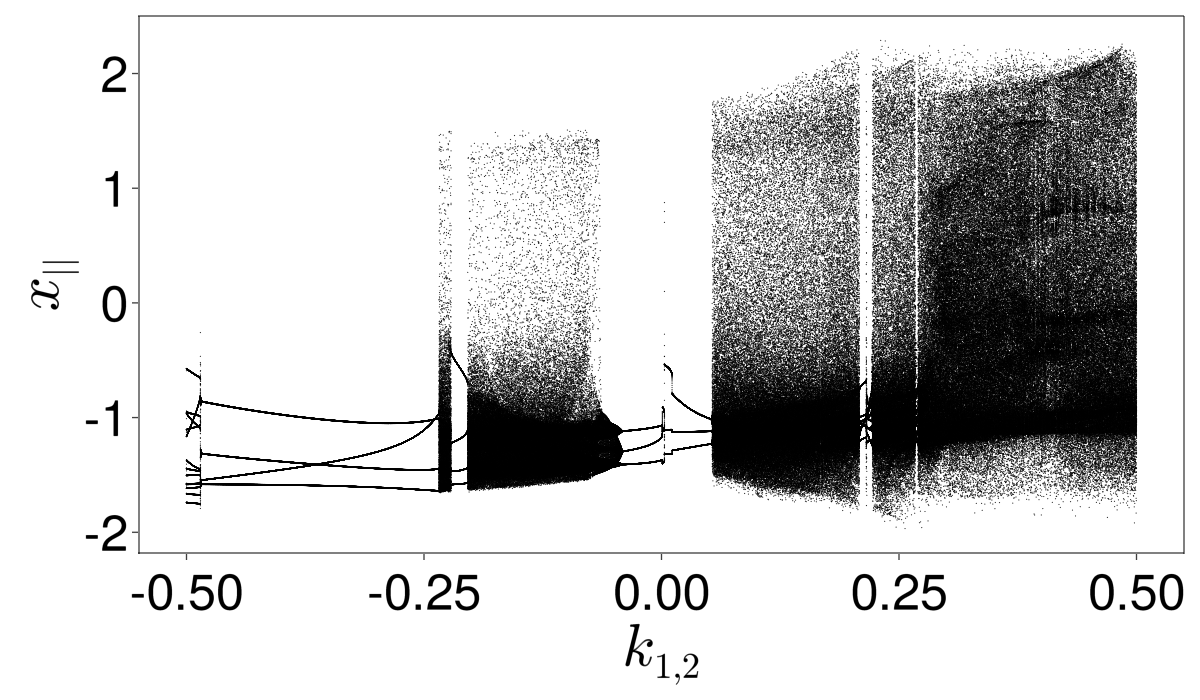

In [22]:
ticks = range(-0.5, 0.5, length = 5)

fig = Figure(resolution = (1200, 700))

ax = Axis(fig[1,1]; xlabel = L"k_{1,2}", ylabel = L"x_{||}",
xlabelsize = 60, ylabelsize = 60,
xticklabelsize = 50, yticklabelsize = 50  )


ax.xticks = ticks

ax.xgridvisible = false
ax.ygridvisible = false
for (j, p) in enumerate(range_chemical)
    scatter!(ax, fill(p, length(output_summ[j])), output_summ[j];
        color = ("black", 1.0), markersize = 0.8
    )
    
end
fig

In [219]:
save("orbit_dia_k00.jld", "data", output_summ)

### Electrical link = 0.01

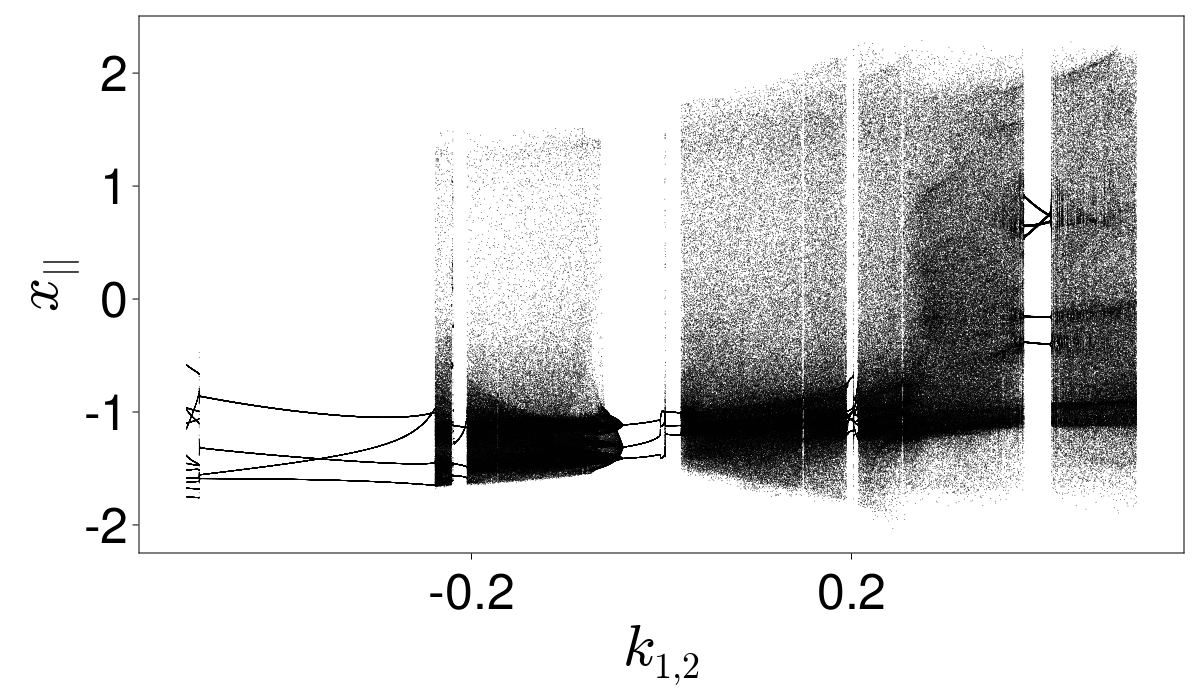

In [31]:
CairoMakie.activate!()
ticks = range(-1.0, 1.0, length = 6)

fig = Figure(resolution = (1200, 700))

ax = Axis(fig[1,1]; xlabel = L"k_{1,2}", ylabel = L"x_{||}",
xlabelsize = 60, ylabelsize = 60,
xticklabelsize = 50, yticklabelsize = 50  )


ax.xticks = ticks

ax.xgridvisible = false
ax.ygridvisible = false

for (j, p) in enumerate(range_chemical)
    scatter!(ax, fill(p, length(output_summ[j])), output_summ[j];
        color = ("black", 1.0), markersize = 0.8
    )
    
end

fig

In [32]:
save("many_plots_k_0_01.jld", "data", output_summ)

In [234]:
save("orbit_dia_k_0_01.jld", "data", output_summ)

### electrical link 0.02

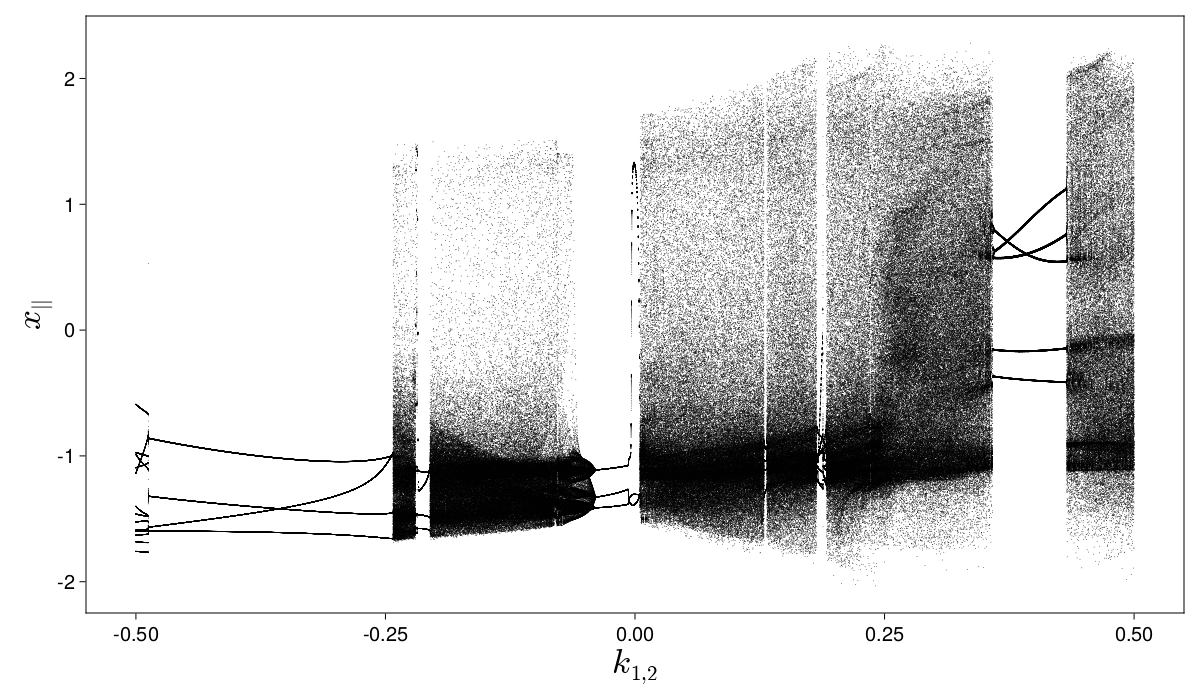

In [65]:
ticks = range(-0.5, 0.5, length = 5)

fig = Figure(resolution = (1200, 700))

ax = Axis(fig[1,1]; xlabel = L"k_{1,2}", ylabel = L"x_{||}",
xlabelsize = 35, ylabelsize = 35,
xticklabelsize = 20, yticklabelsize = 20  )

ax.xticks = ticks

ax.xgridvisible = false
ax.ygridvisible = false

for (j, p) in enumerate(range_chemical)
    scatter!(ax, fill(p, length(output_summ[j])), output_summ[j];
        color = ("black", 1.0), markersize = 0.8
    )
end

fig

In [69]:
save("many_plots_k_0_02.jld", "data", output_summ)

In [244]:
save("orbit_dia_k_0_02.jld", "data", output_summ)

### Electrical link = 0.03

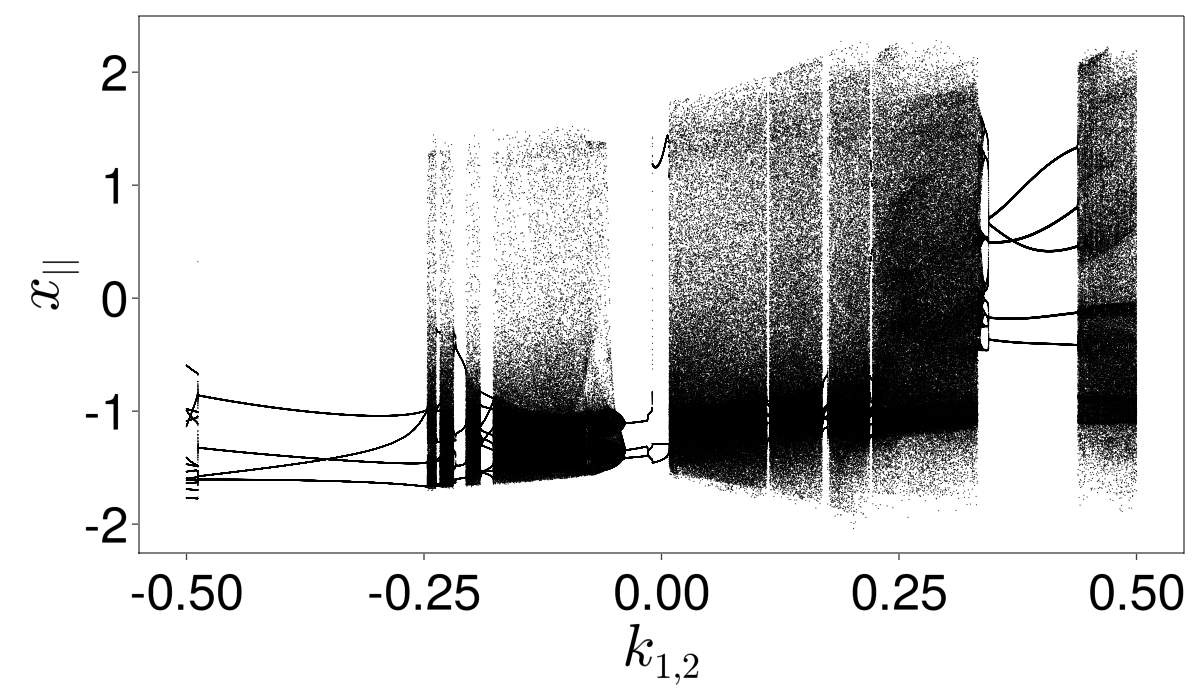

In [76]:
ticks = range(-0.5, 0.5, length = 5)

fig = Figure(resolution = (1200, 700))

ax = Axis(fig[1,1]; xlabel = L"k_{1,2}", ylabel = L"x_{||}",
xlabelsize = 60, ylabelsize = 60,
xticklabelsize = 50, yticklabelsize = 50  )

ax.xticks = ticks

ax.xgridvisible = false
ax.ygridvisible = false

for (j, p) in enumerate(range_chemical)
    scatter!(ax, fill(p, length(output_summ[j])), output_summ[j];
        color = ("black", 1.0), markersize = 0.8
    )
end
fig

In [81]:
save("many_plots_k_0_03.jld", "data", output_summ)

In [252]:
save("orbit_dia_k_0_03.jld", "data", output_summ)

### Electrical link = 0.04 (correct)

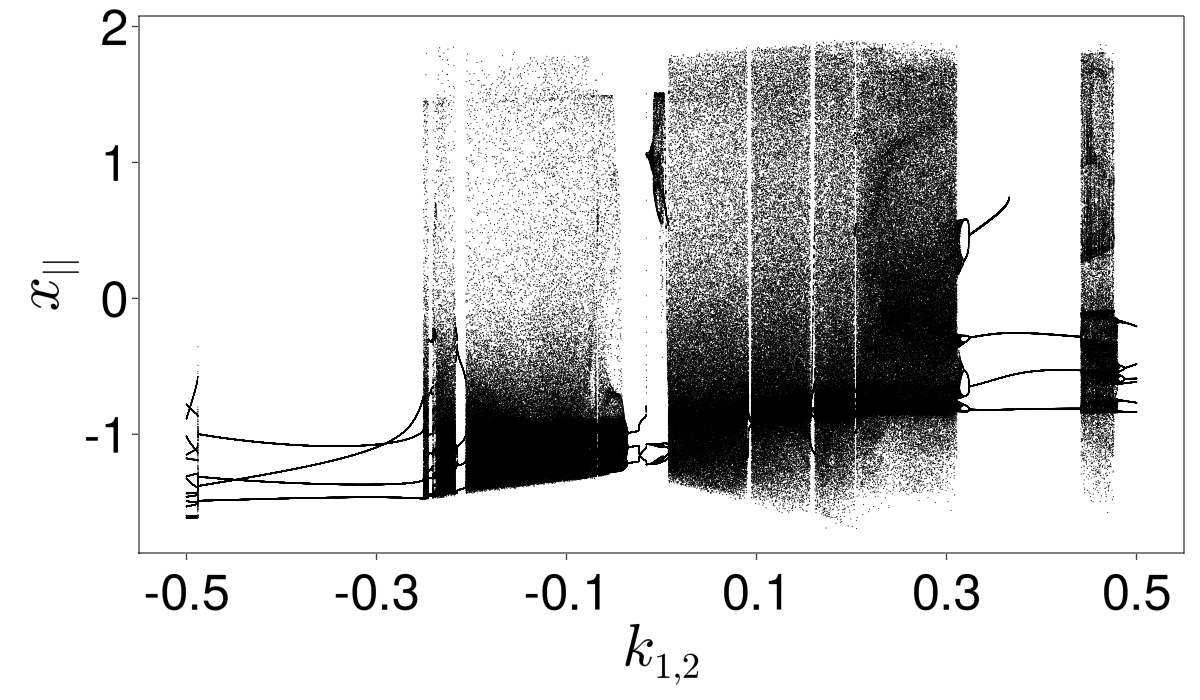

In [99]:
ticks = range(-0.5, 0.5, length = 6)

fig = Figure(resolution = (1200, 700))

ax = Axis(fig[1,1]; xlabel = L"k_{1,2}", ylabel = L"x_{||}",
xlabelsize = 60, ylabelsize = 60,
xticklabelsize = 50, yticklabelsize = 50  )


ax.xticks = ticks

ax.xgridvisible = false
ax.ygridvisible = false

for (j, p) in enumerate(range_chemical)
    scatter!(ax, fill(p, length(output1[j])), output1[j];
        color = ("black", 1.0), markersize = 0.8
    )
        
end

fig

In [100]:
display(fig)

GLMakie.Screen(...)

In [101]:
save("many_plots_k_0_04.jld", "data", output_summ)

In [261]:
save("orbit_dia_k_0_04.jld", "data", output_summ)

### Electrical link  = 0.05

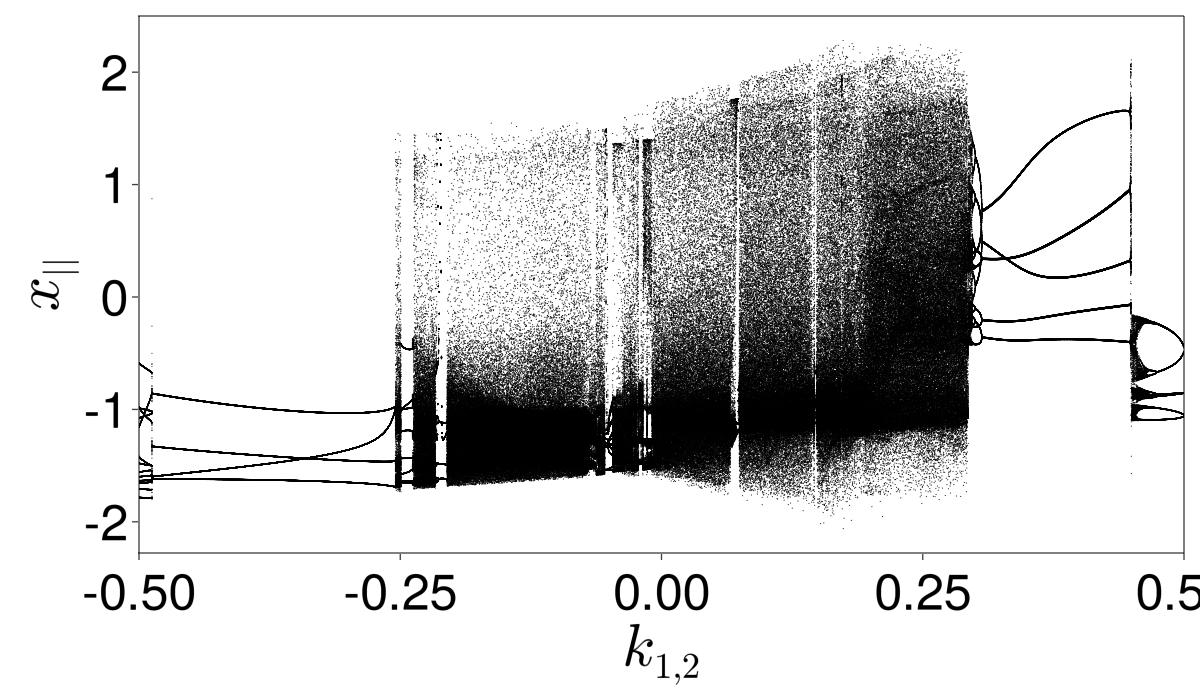

In [171]:
leftborder, rightborder = -0.5, 0.5

ticks = range(leftborder, rightborder, length = 5)

fig = Figure(resolution = (1200, 700))

ax = Axis(fig[1,1]; xlabel = L"k_{1,2}", ylabel = L"x_{||}",
xlabelsize = 60, ylabelsize = 60,
xticklabelsize = 50, yticklabelsize = 50  )


ax.xticks = ticks

ax.xgridvisible = false
ax.ygridvisible = false

xlims!(leftborder, rightborder)

for (j, p) in enumerate(range_chemical)
    scatter!(ax, fill(p, length(output_summ[j])), output_summ[j];
        color = ("black", 1.0), markersize = 0.8
    )
    
end

fig

In [174]:
save("many_plots_k_0_05.jld", "data", output_summ)

In [269]:
save("orbit_dia_k_0_05.jld", "data", output_summ)

### Electrical link = 0.1 (correct)

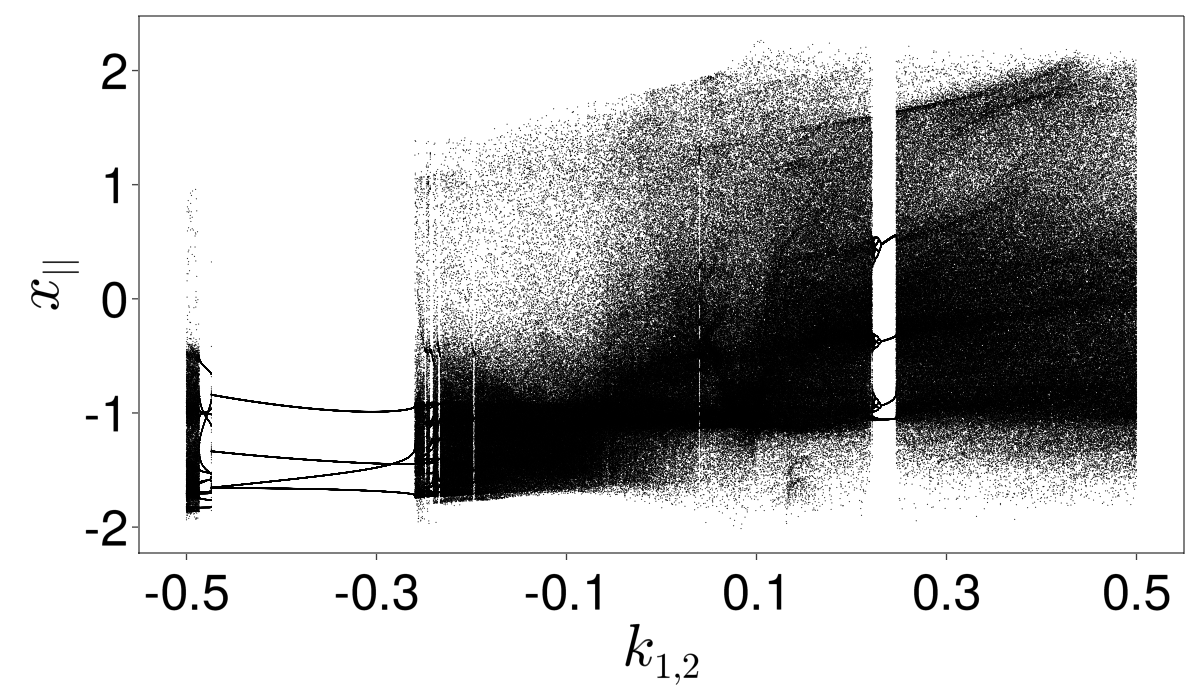

In [183]:
ticks = range(-0.5, 0.5, length = 6)

fig = Figure(resolution = (1200, 700))

ax = Axis(fig[1,1]; xlabel = L"k_{1,2}", ylabel = L"x_{||}",
xlabelsize = 60, ylabelsize = 60,
xticklabelsize = 50, yticklabelsize = 50  )


ax.xticks = ticks

ax.xgridvisible = false
ax.ygridvisible = false

for (j, p) in enumerate(range_chemical)
    scatter!(ax, fill(p, length(output_summ[j])), output_summ[j];
        color = ("black", 1.0), markersize = 0.8
    )
    
end

fig

In [184]:
save("many_plots_k_0_1.jld", "data", output_summ)

In [283]:
save("orbit_dia_k_0_1.jld", "data", output_summ)